7. Seleccione una de las variables y haga un modelo univariado de regresión lineal para
predecir el precio de las casas. Analice el modelo (resumen, residuos, resultados de la
predicción). Muéstrelo gráficamente.

 Modelo entrenado: SalePrice = 24899.75 + 102.49 * GrLivArea

 Evaluación del Modelo:
🔹 MAE (Error Absoluto Medio): 38341.20
🔹 MSE (Error Cuadrático Medio): 3418946311.18
🔹 RMSE (Raíz del Error Cuadrático Medio): 58471.76
🔹 R² (Coeficiente de Determinación): 0.5543


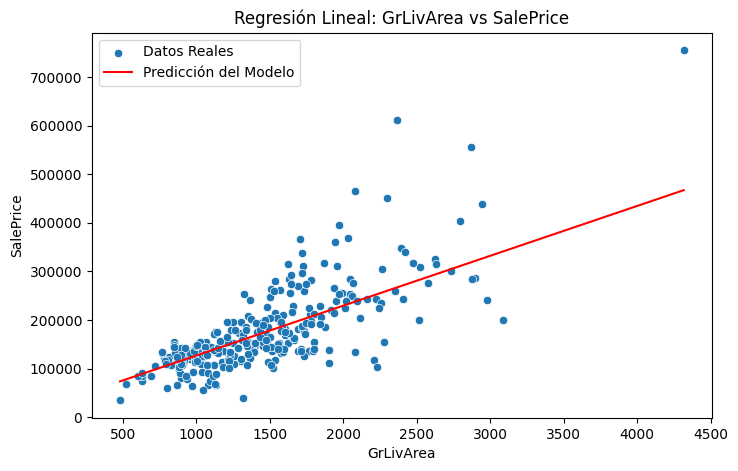

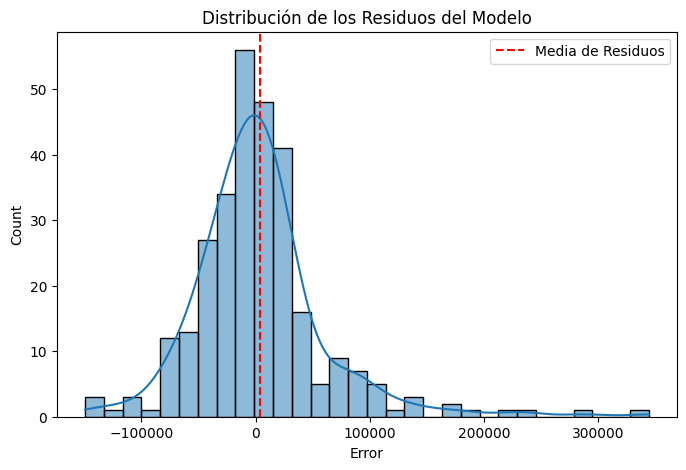

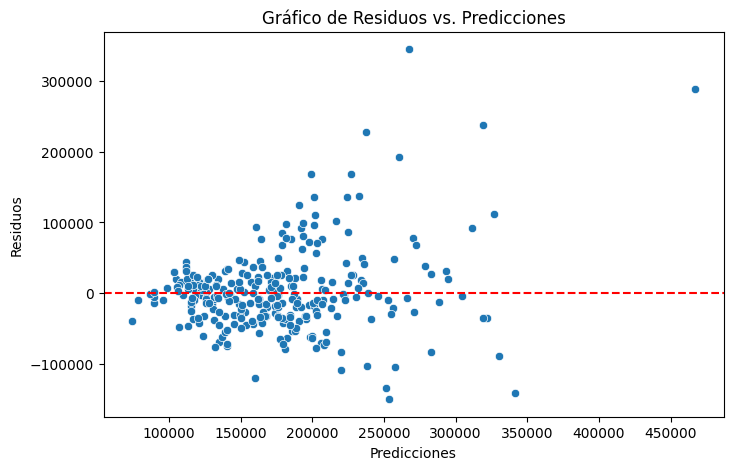

In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("dataset/train.csv")

# Seleccionar solo las columnas necesarias
df = df[['GrLivArea', 'SalePrice']].dropna()  # Asegurar que no haya valores nulos

# Separar en variables predictora y objetivo
X = df[['GrLivArea']]  # Variable predictora
y = df['SalePrice']     # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener coeficientes del modelo
intercept = model.intercept_
slope = model.coef_[0]

print(f" Modelo entrenado: SalePrice = {intercept:.2f} + {slope:.2f} * GrLivArea")

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n Evaluación del Modelo:")
print(f"🔹 MAE (Error Absoluto Medio): {mae:.2f}")
print(f"🔹 MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"🔹 RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"🔹 R² (Coeficiente de Determinación): {r2:.4f}")

# Gráfico de dispersión con la regresión lineal
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label="Datos Reales")
sns.lineplot(x=X_test['GrLivArea'], y=y_pred, color='red', label="Predicción del Modelo")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Regresión Lineal: GrLivArea vs SalePrice")
plt.legend()
plt.show()

# Análisis de residuos
residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=30, kde=True)
plt.axvline(residuos.mean(), color='red', linestyle='dashed', label="Media de Residuos")
plt.title("Distribución de los Residuos del Modelo")
plt.xlabel("Error")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Predicciones")
plt.show()


El modelo de regresión lineal simple entrenado con GrLivArea como variable predictora mostró una relación positiva con SalePrice, lo que indica que a medida que aumenta el área habitable sobre el suelo, también lo hace el precio de la vivienda. Sin embargo, con un coeficiente de determinación R² de 0.5543, el modelo explica solo el 55.43% de la variabilidad en SalePrice, lo que sugiere que otros factores también juegan un papel importante en la determinación del precio.

El análisis de residuos mostró que la mayoría de los errores están distribuidos alrededor de cero, pero existe una cola larga hacia valores positivos, lo que indica que el modelo subestima el precio de algunas casas. Además, en el gráfico de residuos contra predicciones, se observa que los errores tienden a aumentar a medida que SalePrice crece, lo que sugiere la presencia de heterocedasticidad, es decir, la variabilidad del error no es constante en todo el rango de predicciones.

En general, aunque el modelo proporciona una primera aproximación razonable, su rendimiento es limitado por la variabilidad no explicada y la posible influencia de valores atípicos. Para mejorar la predicción, se recomienda explorar modelos multivariados que incluyan variables adicionales con alta correlación con SalePrice, como la calidad general de la construcción (OverallQual) y el tamaño del sótano (TotalBsmtSF). 

8. Haga un modelo de regresión lineal con todas las variables numéricas para predecir el precio
de las casas. Analice el modelo. Muestre el modelo gráficamente"

Evaluación del Modelo Multivariado:
MAE (Error Absoluto Medio): 23643.51
MSE (Error Cuadrático Medio): 1591724600.58
RMSE (Raíz del Error Cuadrático Medio): 39896.42
R² (Coeficiente de Determinación): 0.80


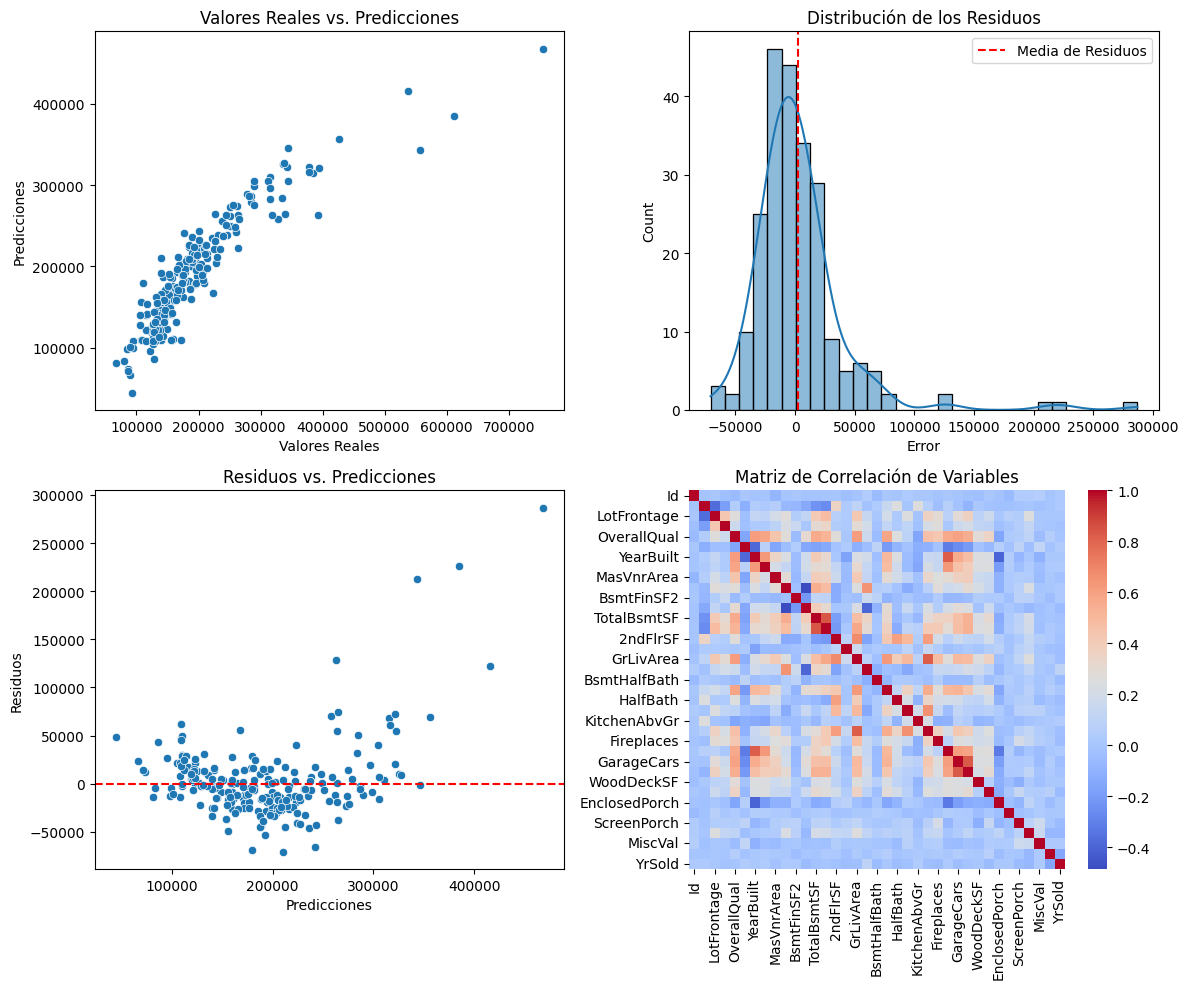


Coeficientes del Modelo de Regresión Lineal Multivariada:
         Variable   Coeficiente
4     OverallQual  19559.892636
26     GarageCars  18435.856643
17   BsmtFullBath  11712.182010
19       FullBath   5126.369920
5     OverallCond   5077.568987
24     Fireplaces   4811.880980
23   TotRmsAbvGrd   4619.633553
18   BsmtHalfBath   1149.084546
6       YearBuilt    285.141599
7    YearRemodAdd    125.360169
32    ScreenPorch     67.392966
31      3SsnPorch     56.618274
16      GrLivArea     29.054608
8      MasVnrArea     26.070187
28     WoodDeckSF     19.995973
14       2ndFlrSF     14.109111
30  EnclosedPorch     11.517105
13       1stFlrSF     10.675457
12    TotalBsmtSF      6.250672
27     GarageArea      5.496781
9      BsmtFinSF1      4.742248
10     BsmtFinSF2      4.465101
15   LowQualFinSF      4.270040
3         LotArea      0.422507
0              Id     -2.206732
11      BsmtUnfSF     -2.956677
29    OpenPorchSF     -3.094351
34        MiscVal     -3.711166
35         Mo

In [4]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("dataset/train.csv")

# Seleccionar solo variables numéricas y eliminar valores nulos
df_numeric = df.select_dtypes(include=['int64', 'float64']).dropna()

# Separar variables predictoras y variable objetivo
X = df_numeric.drop(columns=['SalePrice'])  # Variables predictoras
y = df_numeric['SalePrice']  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Guardar evaluación en un diccionario
model_evaluation = {
    "MAE (Error Absoluto Medio)": mae,
    "MSE (Error Cuadrático Medio)": mse,
    "RMSE (Raíz del Error Cuadrático Medio)": rmse,
    "R² (Coeficiente de Determinación)": r2
}

# Mostrar evaluación del modelo
print("Evaluación del Modelo Multivariado:")
for key, value in model_evaluation.items():
    print(f"{key}: {value:.2f}")

# Obtener coeficientes del modelo
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
coefficients = coefficients.sort_values(by="Coeficiente", ascending=False)

# Análisis de residuos
residuos = y_test - y_pred

# Crear gráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de dispersión: Predicciones vs. Valores Reales
sns.scatterplot(x=y_test, y=y_pred, ax=axs[0, 0])
axs[0, 0].set_xlabel("Valores Reales")
axs[0, 0].set_ylabel("Predicciones")
axs[0, 0].set_title("Valores Reales vs. Predicciones")

# Histograma de residuos
sns.histplot(residuos, bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].axvline(residuos.mean(), color='red', linestyle='dashed', label="Media de Residuos")
axs[0, 1].set_xlabel("Error")
axs[0, 1].set_title("Distribución de los Residuos")
axs[0, 1].legend()

# Gráfico de residuos vs. predicciones
sns.scatterplot(x=y_pred, y=residuos, ax=axs[1, 0])
axs[1, 0].axhline(0, color='red', linestyle='dashed')
axs[1, 0].set_xlabel("Predicciones")
axs[1, 0].set_ylabel("Residuos")
axs[1, 0].set_title("Residuos vs. Predicciones")

# Matriz de correlación
sns.heatmap(X_train.corr(), cmap="coolwarm", annot=False, ax=axs[1, 1])
axs[1, 1].set_title("Matriz de Correlación de Variables")

plt.tight_layout()
plt.show()

# Mostrar coeficientes del modelo
print("\nCoeficientes del Modelo de Regresión Lineal Multivariada:")
print(coefficients)


El modelo de regresión lineal multivariado obtuvo un **R² de 0.80**, lo que indica que el 80% de la variabilidad en el precio de las casas (`SalePrice`) puede explicarse por las variables numéricas utilizadas. Sin embargo, el **error absoluto medio (MAE) de 23,643.51 y la raíz del error cuadrático medio (RMSE) de 39,986.42** sugieren que las predicciones pueden tener desviaciones considerables en algunos casos. El análisis de residuos muestra una distribución **ligeramente sesgada**, lo que indica que el modelo podría beneficiarse de una transformación logarítmica en `SalePrice`. Además, algunos coeficientes presentan valores elevados (ej. `OverallQual`, `GarageCars` y `BsmtFullBath`), lo que resalta su influencia en el precio, mientras que otras variables tienen coeficientes cercanos a cero o negativos, lo que podría indicar multicolinealidad o poca relevancia. En general, el modelo es útil para predecir tendencias de precios, pero se recomienda un análisis adicional para mejorar su precisión, incluyendo la eliminación de variables redundantes y la identificación de outliers.